In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/5.63M [00:00<?, ?B/s]
100% 5.63M/5.63M [00:00<00:00, 92.2MB/s]
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  
 Alabama  	0.128
 Arizona  	0.171
 Arkansas 	0.120
California	0.092
 Colorado 	0.111
Connecticut	0.348
 Delaware 	0.169
District of Columbia	0.230
 Florida  	0.143
 Georgia  	0.152
   Guam   	0.076
  Idaho   	0.077
 Illinois 	0.203
 Indiana  	0.162
   Iowa   	0.131
  Kansas  	0.085
 Kentucky 	0.073
Louisiana 	0.287
 Maryland 	0.170
Massachusetts	0.359
 Michigan 	0.212
Minnesota 	0.114
Mississippi	0.225
 Missouri 	0.096
 Montana  	0.073
 Nebraska 	0.085
  Nevada  	0.125
New Hampshire	0.088
New Jersey	0.486
New Mexico	0.128
 New York 	0.476
North Carolina	0.083
North Dakota	0.147
   Ohio 

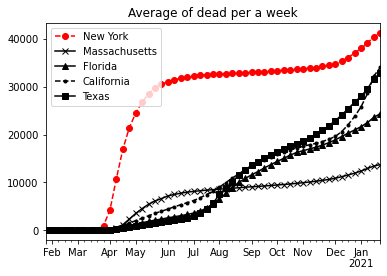

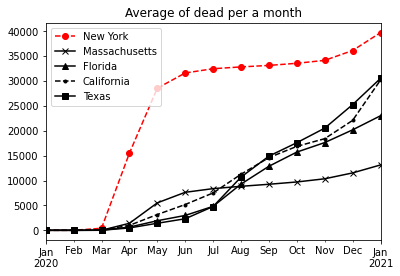

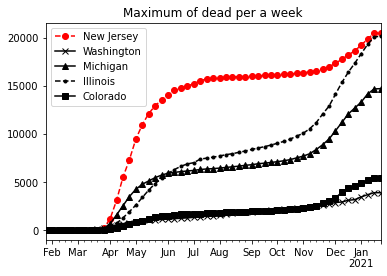

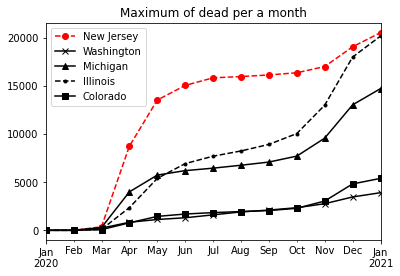

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# データの準備
def prepare():
    # アメリカの新型コロナウイルスによる死者数の統計データ
    !kaggle datasets download -d \
    sudalairajkumar/novel-corona-virus-2019-dataset
    !unzip novel-corona-virus-2019-dataset.zip
    df = pd.read_csv('time_series_covid_19_deaths_US.csv')
    # 州名と人口、日付ごとの死者数を残す
    # 分析に使わない列
    ignores = ['Province_State', 'Population',
               'UID', 'iso2', 'iso3', 'code3',
               'FIPS', 'Admin', 'Admin2', 'Country_Region', 
               'Lat', 'Long_', 'Combined_Key']
    features = []
    for f in df.columns.values:
      if not f in ignores:
        features.append(f)
    X = df.loc[:,features].values
    y = df.loc[:,['Province_State', 'Population']].values
    return df, y, features

def main():
    df, y, features = prepare()
    # 州ごとに死者数の合計を求める
    num_death = df.groupby('Province_State')[features].sum()
    num_death_prv = num_death.sum(axis=1)
    ydf = pd.DataFrame(y, 
  columns=['Province_State', 'Population'])
    n_pop = ydf.groupby('Province_State')['Population'].sum()
    # 州ごとに人口当たりの死者数を求める
    for prv in num_death_prv.index:
        if n_pop[prv] == 0:
            continue
        val = num_death_prv[prv] / n_pop[prv]
        if val >= 0.05: # 0.05以上のみ表示
            print('{0:^10}\t{1:.3f}'.format(prv, val))
    # グラフの線とマーカの種類と色
    style=['ro--', 'kx-', 'k^-', 'k.--', 'ks-']
    # resampleを行うため、行列を入れ替える
    ndf = num_death.transpose()
    # 列名（インデックス）を日付型に変換する
    ndf.index = pd.to_datetime(ndf.index)
    # 対象とする州を絞り込む
    mdf = pd.DataFrame(ndf, 
                      columns=['New York', 'Massachusetts',
 'Florida', 'California', 'Texas'])
    # 1週間ごとの平均死者数を求める
    week_mdf = mdf.resample('W').mean()
    # 平均死者数の推移を可視化する
    week_mdf.plot(title='Average of dead per a week',
                                          style=style)
    plt.savefig('avg_week_dead.png', dpi=400)
    # 1か月ごとの平均死者数を求める
    month_mdf = mdf.resample('M').mean()
    # 平均死者数の推移を可視化する
    month_mdf.plot(title='Average of dead per a month', 
                                           style=style)
    plt.savefig('avg_month_dead.png', dpi=400)
    # 対象とする州を絞り込む
    mdf = pd.DataFrame(ndf, 
                       columns=['New Jersey', 'Washington',
 'Michigan', 'Illinois', 'Colorado'])
    # 1週間ごとの最大死者数に置き換える
    week_ndf = mdf.resample('W').max()
    # 最大死者数の推移を可視化する
    week_ndf.plot(title='Maximum of dead per a week',
                                            style=style)
    plt.savefig('max_week_dead.png', dpi=400)
    # 1か月ごとの最大死者数に置き換える
    month_ndf = mdf.resample('M').max()
    # 最大死者数の推移を可視化する
    month_ndf.plot(title='Maximum of dead per a month',
                                              style=style)
    plt.savefig('max_month_dead.png', dpi=400)

if __name__ == '__main__':
    main()
    